# <font color=green>RecallNet: A Deep Learning Model for Early Detection of Alzheimer's Disease using MRI imaging</font>

### **<font color=purple> packages that need to install to run this code </font>**
- pip install <font color=red>**tensrflow**</font> || in case of GPU use pip install <font color=red>**tensrflow-gpu**</font>
- pip install <font color=red>**imblearn**</font>
- pip install <font color=red>**tensorflow-addons**</font>
- pip install <font color=red>**matplotlib**</font>
- pip install <font color=red>**seaborn**</font>
- pip install <font color=red>**keras**</font>
- pip install <font color=red>**scikit-learn**</font>

### **Dataset [Link](https://www.kaggle.com/datasets/shahidzikria/alz-dataset)**
#### File modified to run on colab
##### **Follow the below instructions**
- Instructions to add dataset in colab from kaggle [Link](https://www.kaggle.com/general/74235)
- download dataset in your current directory or another and carefully add path in the **WORKING_DIRECTORY** variable

In [3]:
%pip install tensorflow
%pip install keras
%pip install imblearn
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
%pip install tensorflow-addons

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scikit-learn in c:\users\amyti\appdata\local\programs\python\python311\lib\site-packages (1.3.0)




[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### <font color=orange> Importing Libraries </font>

In [4]:
import numpy as np
import random

#   Plotting
import seaborn as sns
import matplotlib.pyplot as plt


#   DataGenerator to read images and rescale images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
import tensorflow_addons as tfa

#   count each class samples
from collections import Counter

#   callbacks
from tensorflow.keras.callbacks import ReduceLROnPlateau

#   evaluate precison recall and f1-score of each class of model
from sklearn.metrics import classification_report
#   Show performance of a classification model
from sklearn.metrics import confusion_matrix

#   Different layers
from keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import Softmax
from tensorflow.keras.layers import GroupNormalization

# split dataset to train, validation and test set
from sklearn.model_selection import train_test_split

#   callbacks
from keras import callbacks

#   SMOTETomek from imblance library
from imblearn.combine import SMOTETomek

#   Optimizer
from tensorflow.keras.optimizers import SGD

from sklearn.metrics import roc_curve, auc
from itertools import cycle

c:\Users\amyti\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


### <font color=orange> Define directory of dataset & Classes names </font>

In [9]:
## Set Path Here before running the code
WORKING_DIRECTORY =  ".\dataset"

##  Name of classes 
CLASSES = ['MildDemented',
           'ModerateDemented',
           'NonDemented',
           'VeryMildDemented']

### <font color=orange> Load Images, Rescale Images, and seperate from data generator & Label One Hot encoding </font>

In [10]:
X, y = [], []

## Images rescaling
datagen = ImageDataGenerator(rescale=1.0/255.0)

#   Load images by resizing and shuffling randomly
train_dataset = datagen.flow_from_directory(WORKING_DIRECTORY, target_size=(176, 208),batch_size=6400, shuffle=True)

### Seperate Dataset from  Data Genrator
X, y = train_dataset.next()

Found 6400 images belonging to 4 classes.


In [11]:
samples_before = len(X)
print("Images shape :\t", X.shape)
print("Labels shape :\t", y.shape)

Images shape :	 (6400, 176, 208, 3)
Labels shape :	 (6400, 4)


In [12]:
#   Number of samples in classes 
print("Number of samples in each class:\t", sorted(Counter(np.argmax(y, axis=1)).items()))

#   class labels as per indices
print("Classes Names according to index:\t", train_dataset.class_indices)

Number of samples in each class:	 [(0, 896), (1, 64), (2, 3200), (3, 2240)]
Classes Names according to index:	 {'MildDemented': 0, 'ModerateDemented': 1, 'NonDemented': 2, 'VeryMildDemented': 3}


### <font color=orange> Show some random samples from the original dataset </font>

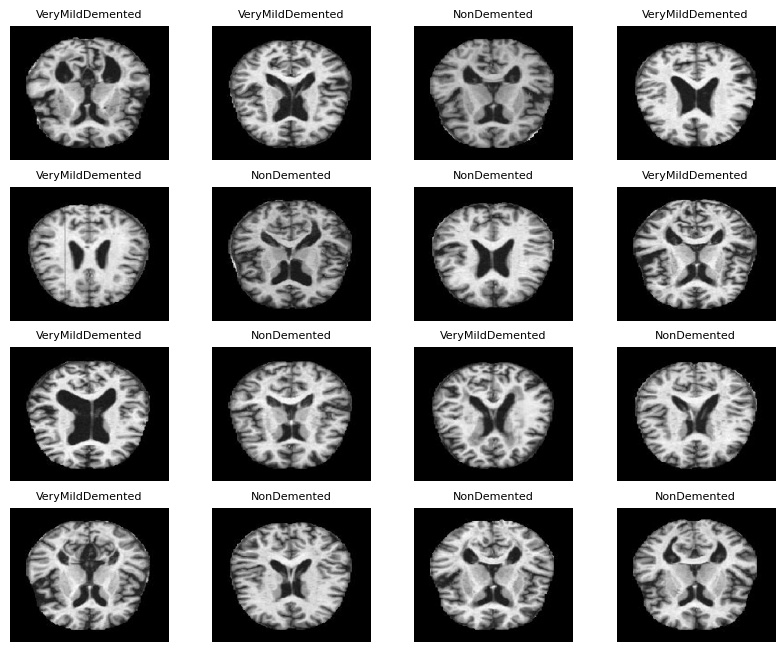

In [13]:
#   show some samples from the dataset randomly
fig = plt.figure(figsize=(10,8))

rows = 4
columns = 4

for i in range(rows * columns):
    fig.add_subplot(rows, columns, i+1)
    num = random.randint(0, len(X)-1 )
    plt.imshow(X[num])
    plt.axis('off')
    plt.title(CLASSES[(np.argmax(y[num]))], fontsize=8)
plt.axis('off')
plt.show()

### <font color=orange> Apply SMOTETomek Algorithm to balance the dataset </font>

In [15]:
#   reshaping the images to 1D
X = X.reshape(-1, 176 * 208 * 3)

# take sample for evaluation of later dataset using test train split
unbal_x, _, unbal_y, _ = train_test_split(X,y, test_size = 0.9)
unbal_x = unbal_x.reshape(-1, 176, 208, 3)

#   Oversampling method to remove imbalance class problem
X, y = SMOTETomek().fit_resample(X, y)

#   reshape images to images size of 208, 176, 3
X = X.reshape(-1, 176, 208, 3)

samples_after = len(X)
print("Number of samples after SMOTETomek :\t", sorted(Counter(np.argmax(y, axis=1)).items()))

# unbalanced data
unbalanced_samples = len(unbal_x)
print("Number of samples in unbalanced dataset: \t", sorted(Counter(np.argmax(unbal_y, axis = 1)).items()))

Number of samples after SMOTETomek :	 [(0, 3200), (1, 3200), (2, 3200), (3, 3200)]
Number of samples in unbalanced dataset: 	 [(0, 816), (1, 58), (2, 2855), (3, 2031)]


### <font color=orange> Show some random samples from the Generated dataset </font>

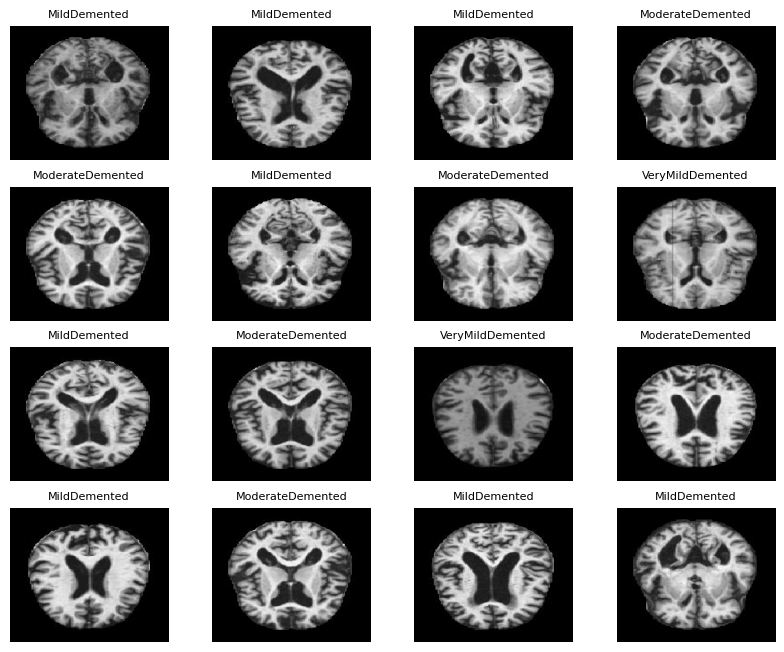

In [16]:
fig = plt.figure(figsize=(10,8))

rows = 4
columns = 4

for i in range(rows * columns):
    fig.add_subplot(rows, columns, i+1)
    num = random.randint(samples_before, samples_after - 1 )
    plt.imshow(X[num])
    plt.axis('off')
    plt.title(CLASSES[(np.argmax(y[num]))], fontsize=8)
plt.axis('off')
plt.show()

### <font color=orange> Splitting dataset for Training, Validation & Testing </font>

In [17]:
#   20% split to validation and 80% split to train set
X_train, x_val, y_train, y_val = train_test_split(X,y, test_size = 0.2)

#   20% split to test from 80% of train and 60% remains in train set
X_train, x_test, y_train, y_test = train_test_split(X_train,y_train, test_size = 0.2)

# Number of samples after train test split
print("Number of samples after splitting into Training, validation & test set\n")

print("Train     \t",sorted(Counter(np.argmax(y_train, axis=1)).items()))
print("Validation\t",sorted(Counter(np.argmax(y_val, axis=1)).items()))
print("Test      \t",sorted(Counter(np.argmax(y_test, axis=1)).items()))

Number of samples after splitting into Training, validation & test set

Train     	 [(0, 2016), (1, 2035), (2, 2093), (3, 2048)]
Validation	 [(0, 685), (1, 624), (2, 617), (3, 634)]
Test      	 [(0, 499), (1, 541), (2, 490), (3, 518)]


In [18]:
#   to free memeory we don't need this one as we split our data
del X, y

### <font color=orange> Model Architecture </font>

In [19]:
from keras.initializers import GlorotUniform
init = GlorotUniform

model = Sequential()

model.add(Input(shape=(176, 208, 3)))

model.add(Convolution2D(16, 1, kernel_initializer=init))
# add instance normalization
model.add(GroupNormalization(groups = -1))
model.add(ReLU())
model.add(AveragePooling2D(pool_size=(2,2)))

model.add(Convolution2D(32, 5, kernel_initializer=init))
# add instance normalization
model.add(GroupNormalization(groups = -1))
model.add(ReLU())
model.add(AveragePooling2D(pool_size=(2,2)))

model.add(Convolution2D(64, 5, kernel_initializer=init))
# add instance normalization
model.add(GroupNormalization(groups = -1))
model.add(ReLU())
model.add(AveragePooling2D(pool_size=(2,2)))

model.add(Convolution2D(128, 5, kernel_initializer=init))
# add instance normalization
model.add(GroupNormalization(groups = -1))
model.add(ReLU())
model.add(AveragePooling2D(pool_size=(2,2)))

model.add(Dropout(0.01))

model.add(Flatten())

# add attention mechanism
#model.add(MultiHeadAttention(num_heads=1, key_dim=128, value_dim=None))

model.add(Dense(256, kernel_initializer=init))
model.add(ReLU())
model.add(Dropout(0.03))

model.add(Dense(4, kernel_initializer=init))
model.add(Softmax())

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 176, 208, 16)      64        
                                                                 
 group_normalization (Group  (None, 176, 208, 16)      32        
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 176, 208, 16)      0         
                                                                 
 average_pooling2d (Average  (None, 88, 104, 16)       0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 84, 100, 32)       12832     
                                                                 
 group_normalization_1 (Gro  (None, 84, 100, 32)       6

### <font color=orange> Compiling the Model </font>

In [20]:
### Model Compilation
model.compile(
    optimizer=SGD(learning_rate=0.01), 
    loss = tf.keras.losses.CategoricalCrossentropy(name='loss'), 
    metrics=[
        tf.keras.metrics.CategoricalAccuracy(name='acc'), 
        tf.keras.metrics.AUC(name='auc'),
        tfa.metrics.F1Score(num_classes=4),
        tf.metrics.Precision(name="precision"),
        tf.metrics.Recall(name="recall") ])


### <font color=orange> Defining CALLBACKS to reduce Learning Rate </font>

In [21]:
# callbacks used in model to perform well
rop_callback = ReduceLROnPlateau(monitor="val_loss", patience=2)

CALLBACKS = [rop_callback]

### <font color=orange> Training of the Model </font>

In [22]:
#   declare to run on small gpu create batch sizes of images
valAug = ImageDataGenerator()

#   defining batch size
batch_size = 8

history = model.fit(valAug.flow(X_train, y_train, batch_size=batch_size, shuffle = True),
steps_per_epoch=len(X_train) // batch_size,
validation_data=valAug.flow(x_val, y_val, batch_size=batch_size, shuffle = True),
validation_steps=len(x_test) // batch_size,
epochs= 20,
batch_size=batch_size,
callbacks = CALLBACKS
)

Epoch 1/20
1024/1024 [==============================] - 277s 269ms/step - loss: 0.8292 - acc: 0.6118 - auc: 0.8709 - f1_score: 0.6049 - precision: 0.7437 - recall: 0.4629 - val_loss: 0.6229 - val_acc: 0.7129 - val_auc: 0.9299 - val_f1_score: 0.7119 - val_precision: 0.8130 - val_recall: 0.5859 - lr: 0.0100
Epoch 2/20
1024/1024 [==============================] - 275s 268ms/step - loss: 0.5660 - acc: 0.7408 - auc: 0.9401 - f1_score: 0.7402 - precision: 0.7968 - recall: 0.6666 - val_loss: 0.4928 - val_acc: 0.7739 - val_auc: 0.9570 - val_f1_score: 0.7816 - val_precision: 0.8015 - val_recall: 0.7451 - lr: 0.0100
Epoch 3/20
1024/1024 [==============================] - 284s 277ms/step - loss: 0.4279 - acc: 0.8171 - auc: 0.9665 - f1_score: 0.8172 - precision: 0.8420 - recall: 0.7831 - val_loss: 0.3324 - val_acc: 0.8506 - val_auc: 0.9793 - val_f1_score: 0.8509 - val_precision: 0.8552 - val_recall: 0.8423 - lr: 0.0100
Epoch 4/20
1024/1024 [==============================] - 285s 278ms/step - loss:

### <font color=orange> Evaluation of Model with the Test data </font>

In [23]:
### Evaluate Model
test_scores = model.evaluate(x_test, y_test, batch_size = 32)


print("\n\nTesting Loss : \t\t {0:0.6f}".format(test_scores[0] ))
print("Testing Accuracy : \t {0:0.6f} %".format(test_scores[1] * 100))
print("Testing AUC : \t\t {0:0.6f} %".format(test_scores[2] * 100))
print("Testing F1-Score : \t {0:0.6f} %".format(((test_scores[3][0] + test_scores[3][1] + test_scores[3][2] + test_scores[3][3])/4) * 100))
print("Testing Precision : \t {0:0.6f} %".format(test_scores[4] * 100))
print("Testing Recall : \t {0:0.6f} %".format(test_scores[5] * 100))

64/64 [==============================] - 13s 196ms/step - loss: 0.0234 - acc: 0.9932 - auc: 0.9996 - f1_score: 0.9931 - precision: 0.9932 - recall: 0.9927


Testing Loss : 		 0.023440
Testing Accuracy : 	 99.316406 %
Testing AUC : 		 99.959898 %
Testing F1-Score : 	 99.306273 %
Testing Precision : 	 99.316072 %
Testing Recall : 	 99.267578 %


### <font color=orange> Evaluation of Model with the original unbalanced data </font>

In [24]:
### evaluation with unbalanced data
unbal_scores = model.evaluate(unbal_x, unbal_y, batch_size = 32)


print("\n\nTesting Loss : \t\t {0:0.6f}".format(unbal_scores[0] ))
print("Testing Accuracy : \t {0:0.6f} %".format(unbal_scores[1] * 100))
print("Testing AUC : \t\t {0:0.6f} %".format(unbal_scores[2] * 100))
print("Testing F1-Score : \t {0:0.6f} %".format(((unbal_scores[3][0] + unbal_scores[3][1] + unbal_scores[3][2] + unbal_scores[3][3])/4) * 100))
print("Testing Precision : \t {0:0.6f} %".format(unbal_scores[4] * 100))
print("Testing Recall : \t {0:0.6f} %".format(unbal_scores[5] * 100))

180/180 [==============================] - 37s 195ms/step - loss: 0.0144 - acc: 0.9964 - auc: 0.9997 - f1_score: 0.9974 - precision: 0.9964 - recall: 0.9960


Testing Loss : 		 0.014417
Testing Accuracy : 	 99.635416 %
Testing AUC : 		 99.973756 %
Testing F1-Score : 	 99.735010 %
Testing Precision : 	 99.635291 %
Testing Recall : 	 99.600697 %


### <font color=orange> Model Training graphs </font>
- Accuracy
- Loss
- AUC
- Precision
- Recall
- F1-Score

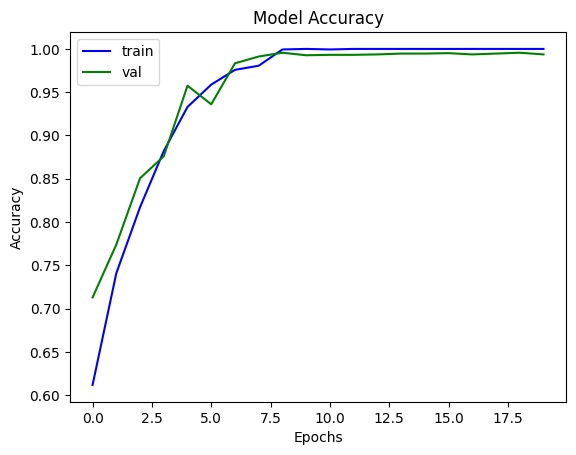

In [25]:
plt.plot(history.history['acc'], 'b')
plt.plot(history.history['val_acc'], 'g')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["train", "val"])
plt.show()

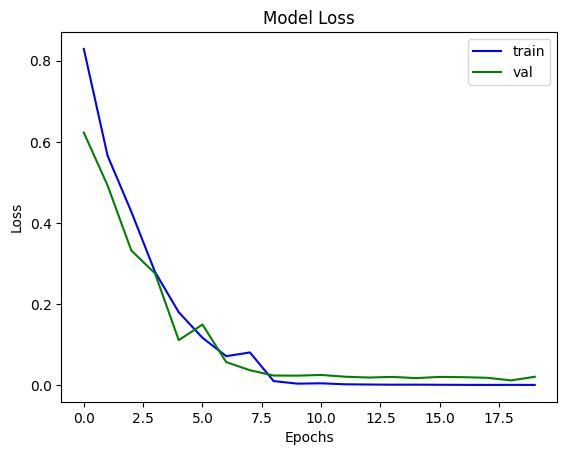

In [26]:
plt.plot(history.history['loss'], 'b')
plt.plot(history.history['val_loss'], 'g')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["train", "val"])
plt.show()

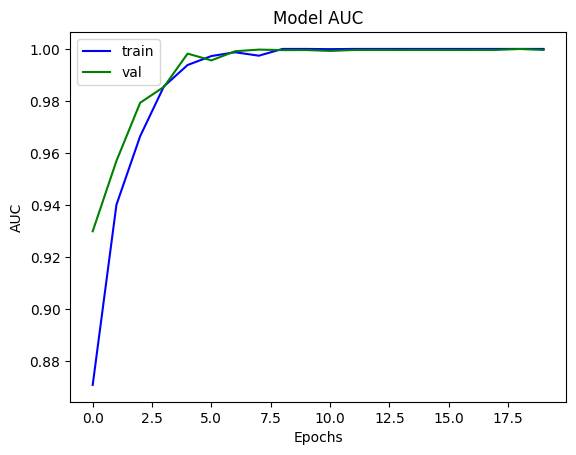

In [27]:
plt.plot(history.history['auc'], 'b')
plt.plot(history.history['val_auc'], 'g')
plt.title("Model AUC")
plt.xlabel("Epochs")
plt.ylabel("AUC")
plt.legend(["train", "val"])
plt.show()

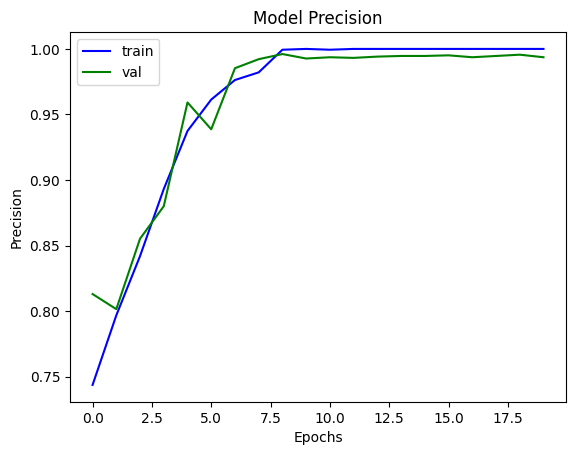

In [28]:
plt.plot(history.history['precision'], 'b')
plt.plot(history.history['val_precision'], 'g')
plt.title("Model Precision")
plt.xlabel("Epochs")
plt.ylabel("Precision")
plt.legend(["train", "val"])
plt.show()

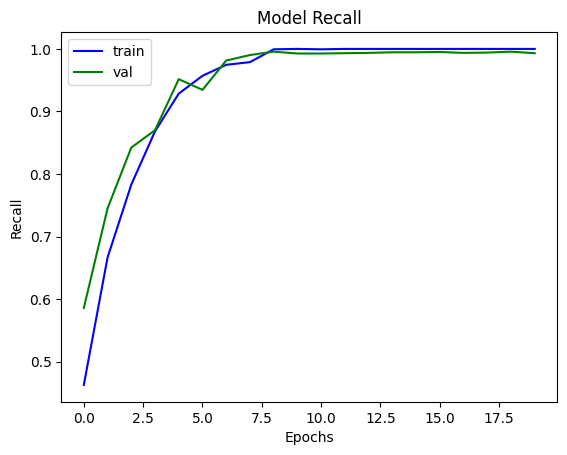

In [29]:
plt.plot(history.history['recall'], 'b')
plt.plot(history.history['val_recall'], 'g')
plt.title("Model Recall")
plt.xlabel("Epochs")
plt.ylabel("Recall")
plt.legend(["train", "val"])
plt.show()

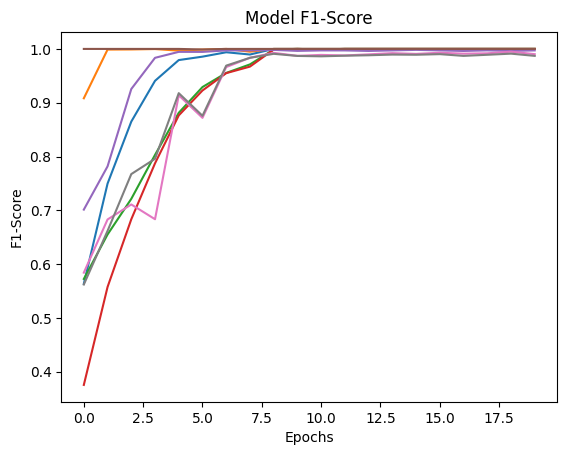

In [30]:
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title("Model F1-Score")
plt.xlabel("Epochs")
plt.ylabel("F1-Score")
plt.show()

### <font color=orange> Test set Evaluation </font>
- Classification Report
- Confusion Matrix
- ROC Curve
- Extension ROC Multiclass

In [31]:
pred_labels = model.predict(x_test, batch_size=32)

def roundoff(arr):
    arr[np.argwhere(arr != arr.max())] = 0
    arr[np.argwhere(arr == arr.max())] = 1
    return arr

for labels in pred_labels:
    labels = roundoff(labels)

print(classification_report(y_test, pred_labels, target_names=CLASSES))


64/64 [==============================] - 13s 198ms/step
                  precision    recall  f1-score   support

    MildDemented       0.99      1.00      1.00       499
ModerateDemented       1.00      1.00      1.00       541
     NonDemented       0.99      0.99      0.99       490
VeryMildDemented       0.99      0.98      0.99       518

       micro avg       0.99      0.99      0.99      2048
       macro avg       0.99      0.99      0.99      2048
    weighted avg       0.99      0.99      0.99      2048
     samples avg       0.99      0.99      0.99      2048



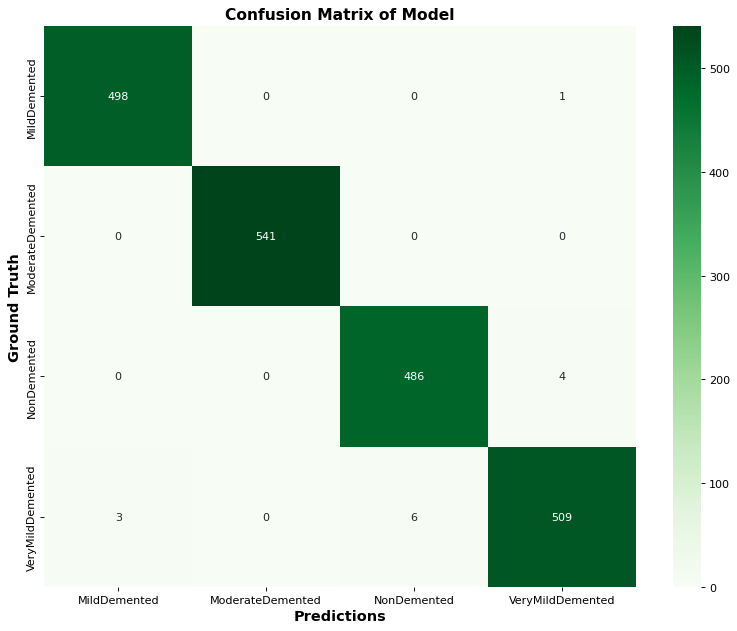

In [32]:
pred_ls = np.argmax(pred_labels, axis=1)
test_ls = np.argmax(y_test, axis=1)

conf_arr = confusion_matrix(test_ls, pred_ls)

plt.figure(figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

ax = sns.heatmap(conf_arr, cmap='Greens', annot=True, fmt='d', xticklabels= CLASSES, yticklabels=CLASSES)

plt.title('Confusion Matrix of Model', fontweight='bold', fontsize=14.0)
plt.xlabel('Predictions', fontweight='bold', fontsize=13)
plt.ylabel('Ground Truth', fontweight='bold', fontsize=13)
plt.tight_layout()
plt.show(ax)

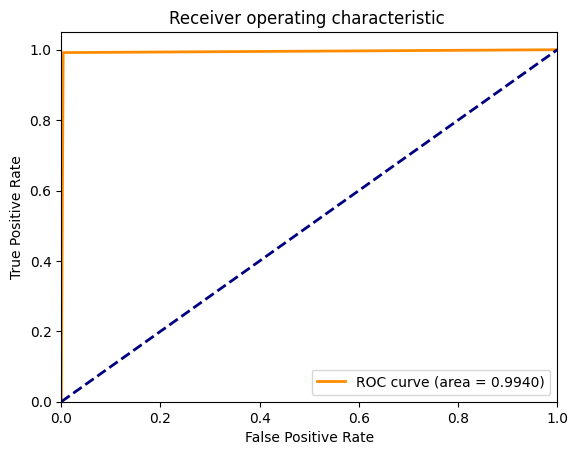

In [33]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], pred_labels[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), pred_labels.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.4f)" % roc_auc[2])

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic ")
plt.legend(loc="lower right")
plt.show()

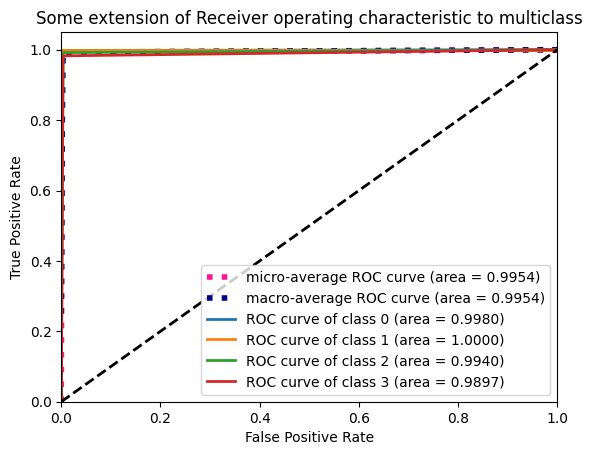

In [34]:
n_classes = 4
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.4f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.4f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.4f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

### <font color=orange> Unbalanced set Evaluation </font>
- Classification Report
- Confusion Matrix

In [35]:
pred_labels_unbal = model.predict(unbal_x, batch_size=32)

def roundoff(arr):
    arr[np.argwhere(arr != arr.max())] = 0
    arr[np.argwhere(arr == arr.max())] = 1
    return arr

for labels_unbal in pred_labels_unbal:
    labels_unbal = roundoff(labels_unbal)

print(classification_report(unbal_y, pred_labels_unbal, target_names=CLASSES))

180/180 [==============================] - 36s 202ms/step
                  precision    recall  f1-score   support

    MildDemented       1.00      1.00      1.00       816
ModerateDemented       1.00      1.00      1.00        58
     NonDemented       1.00      1.00      1.00      2855
VeryMildDemented       1.00      0.99      0.99      2031

       micro avg       1.00      1.00      1.00      5760
       macro avg       1.00      1.00      1.00      5760
    weighted avg       1.00      1.00      1.00      5760
     samples avg       1.00      1.00      1.00      5760



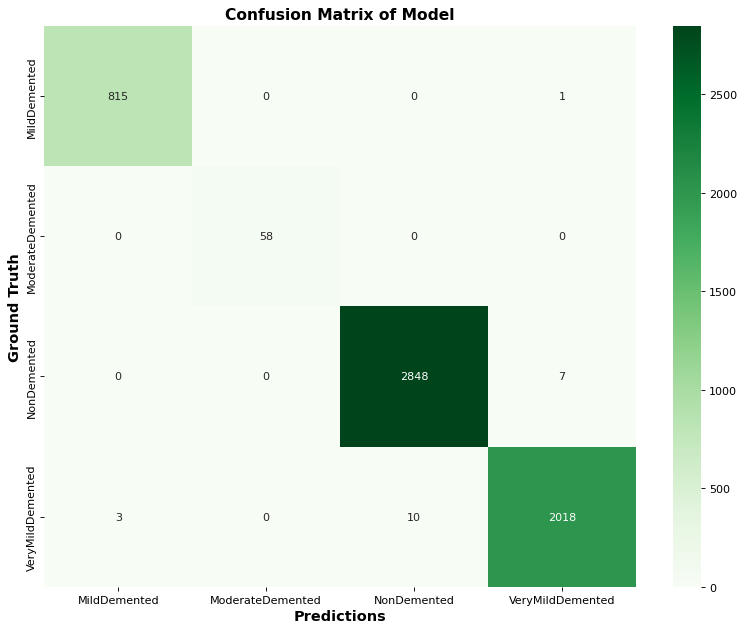

In [36]:
pred_ls_unbal = np.argmax(pred_labels_unbal, axis=1)
test_ls_unbal = np.argmax(unbal_y, axis=1)

conf_arr_unbal = confusion_matrix(test_ls_unbal, pred_ls_unbal)

plt.figure(figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

ax = sns.heatmap(conf_arr_unbal, cmap='Greens', annot=True, fmt='d', xticklabels= CLASSES, yticklabels=CLASSES)

plt.title('Confusion Matrix of Model', fontweight='bold', fontsize=14.0)
plt.xlabel('Predictions', fontweight='bold', fontsize=13)
plt.ylabel('Ground Truth', fontweight='bold', fontsize=13)
plt.tight_layout()
plt.show(ax)

### <font color=orange> Saving Model for Future Use </font>

In [37]:
#    To save the model in the current directory
model.save(".\\model.h5")

c:\Users\amyti\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
